In [8]:
from src.utils import poses_from_vicon, set_axes_equal, compute_transformation_matrix, apply_transformation, compute_ate, interpolate_to_percentage
import matplotlib.pyplot as plt
import h5py
import numpy as np
np.set_printoptions(precision=3, suppress=True)
%matplotlib widget

from scipy.signal import resample_poly
from scipy.spatial.transform import Rotation

import cv2
import mediapy
from PIL import Image, ImageDraw, ImageFont

In [9]:
f = h5py.File(
    "/Users/jannik/Repos/demonstration-interface/data/session_20240626_144414_VICON_with_tracking/episode_20240626_144627.h5",
    "r",
)
color_images = np.array(f["color_images"])
color_images = np.array(
    [cv2.cvtColor(image, cv2.COLOR_BGR2RGB) for image in color_images]
)

depth_images = np.array(f["depth_images"])
# depth_images = cv2.normalize(depth_images, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_32F)

In [10]:
index = 25

""

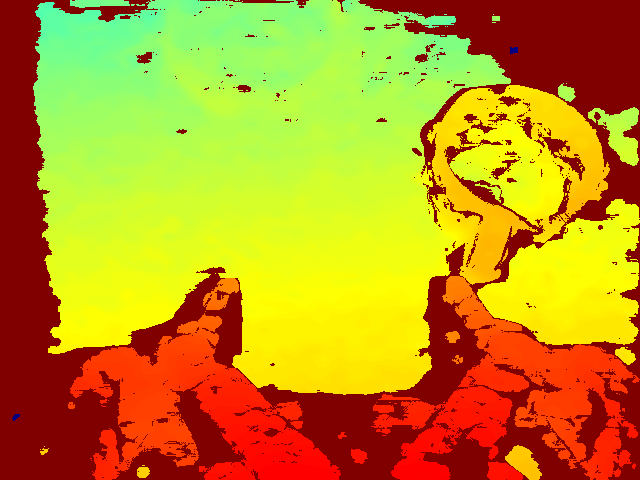

In [11]:
depth_image = depth_images[index]
max_depth = 0.6 # meters
max_depth_bit = 10000*max_depth
depth_image[depth_image>max_depth_bit] = max_depth_bit

# Convert depth to 8-bit and BGR for OpenCV
depth_image_normalized = cv2.normalize(depth_image, None, 0, 255, cv2.NORM_MINMAX)
depth_image_8bit = np.uint8(depth_image_normalized)
depth_colormap = cv2.applyColorMap(depth_image_8bit, cv2.COLORMAP_JET)
mediapy.show_image(depth_colormap)
mediapy.write_image("images/depth_image.jpg", depth_colormap)

""

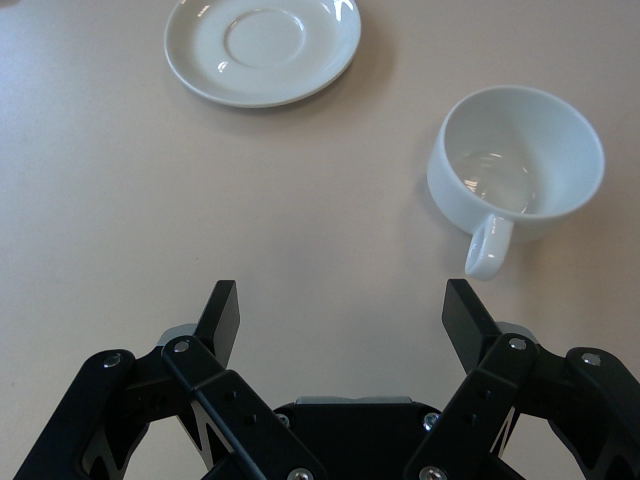

In [12]:
mediapy.show_image(color_images[index])
mediapy.write_image("images/color_image.jpg", color_images[index])